# Heart Diseases Prediction - ML Project
#### **Roll No.**

*CS21092*

*CS21083*

*CS21077*

## About the dataset


https://archive.ics.uci.edu/dataset/45/heart+disease

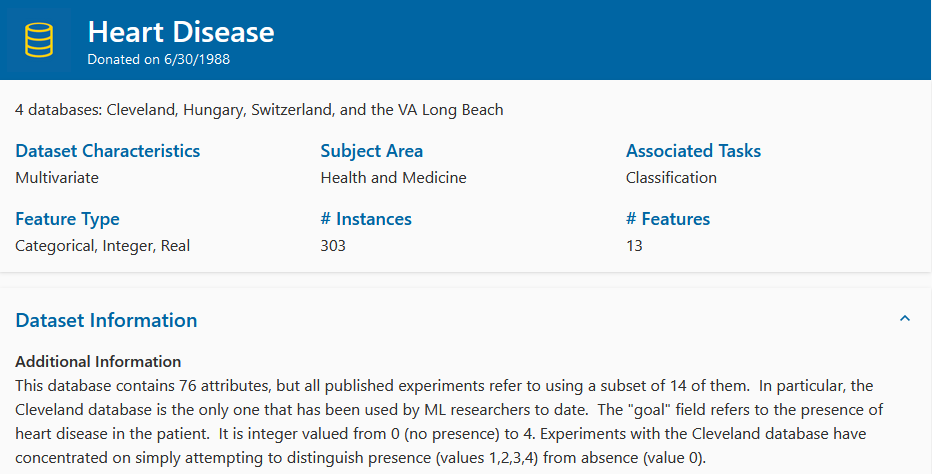


In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Get the data

In [17]:
pip install ucimlrepo

In [3]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_disease = fetch_ucirepo(id=45)

# data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

"""
From the repository

The "goal" field refers to the presence of heart disease in the patient.
It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland
database have concentrated on simply attempting to distinguish
presence (values 1,2,3,4) from absence (value 0).
"""

print("Y \n", y.head())

# making y binary where 0 means absence and 1 means presence
y_processed = pd.DataFrame(np.where(y == 0, 0, 1), columns=['num'])
print("Processed Y",y_processed.head())




Y 
    num
0    0
1    2
2    1
3    0
4    0
Processed Y    num
0    0
1    1
2    1
3    0
4    0


In [4]:
df = pd.concat([X, y_processed], axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


## Dataset description - **Taken from the metadata**
     
| __Variable__ | __Description__ |
|     :---      |       :---      |      
| __age__ | Age of the patient in years |
| __sex__ | Gender of the patient (0 = male, 1 = female) |
| __cp__ | Chest pain type: <br> 1: Typical angina <br> 2: Atypical angina <br> 3: Non-anginal pain <br> 4: Asymptomatic |
| __trestbps__ | Resting blood pressure in mm Hg |
| __chol__ | Serum cholesterol in mg/dl |                     
| __fbs__ | Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false) |
| __restecg__ | Resting electrocardiographic results: <br> 0: Normal <br> 1: Having ST-T wave abnormality <br> 2: Showing probable or definite left ventricular hypertrophy |  
| __thalach__ | Maximum heart rate achieved during a stress test |                      
| __exang__ | Exercise-induced angina (1 = yes, 0 = no) |
| __oldpeak__ | ST depression induced by exercise relative to rest |
| __slope__ | Slope of the peak exercise ST segment: <br> 1: Upsloping <br> 2: Flat <br> 3: Downsloping |                      
| __ca__ | Number of major vessels (0-3) colored by fluoroscopy |              
| __thal__ | Thalium stress test result: <br> 3: Normal <br> 6: Fixed defect <br> 7: Reversible defect  |
| __target__ | Heart disease status (0 = no disease, 1 = presence of disease) |

In [5]:
df.shape


(303, 14)

In [6]:
df.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [7]:
df.duplicated().sum()


0

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int32  
dtypes: float64(3), int32(1), int64(10)
memory usage: 32.1 KB


In [9]:
df.nunique()


age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
num           2
dtype: int64

In [10]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [11]:
print("Categories in 'sex' variable:     ",end=" " )
print(df['sex'].unique())

print("Categories in 'num' variable:  ",end=" ")
print(df['num'].unique())

print("Categories in 'exang' variable:",end=" " )
print(df['exang'].unique())

print("Categories in 'fbs' variable:     ",end=" " )
print(df['fbs'].unique())


Categories in 'sex' variable:      [1 0]
Categories in 'num' variable:   [0 1]
Categories in 'exang' variable: [0 1]
Categories in 'fbs' variable:      [1 0]


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 14 numerical features : ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

We have 0 categorical features : []


 Exploring Data ( Visualization )
Visualize distribution to make some conclusion.
Histogram

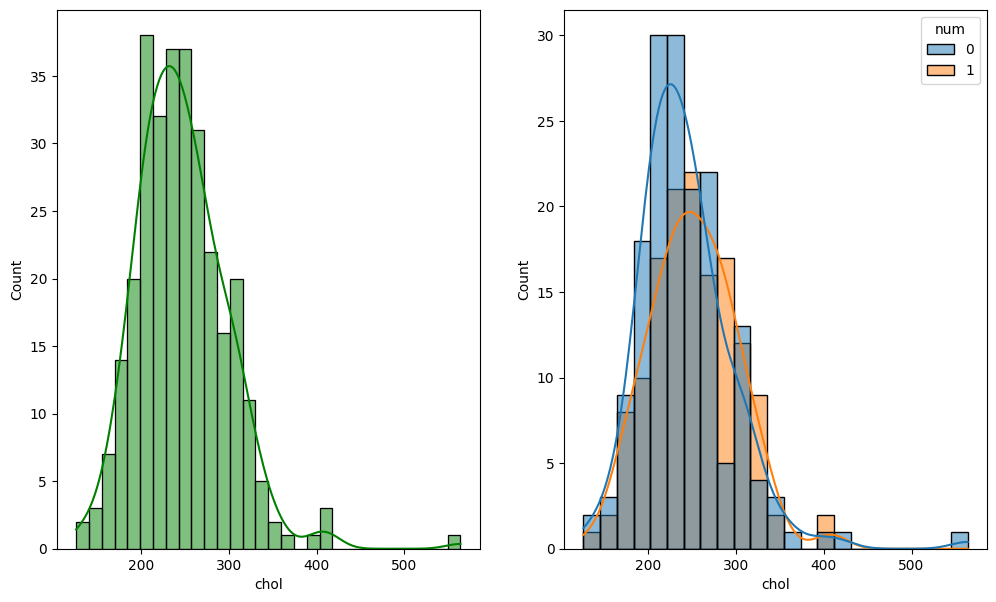

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 7))
plt.subplot(121)
sns.histplot(data=df,x='chol',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='chol',kde=True,hue='num')
plt.show()

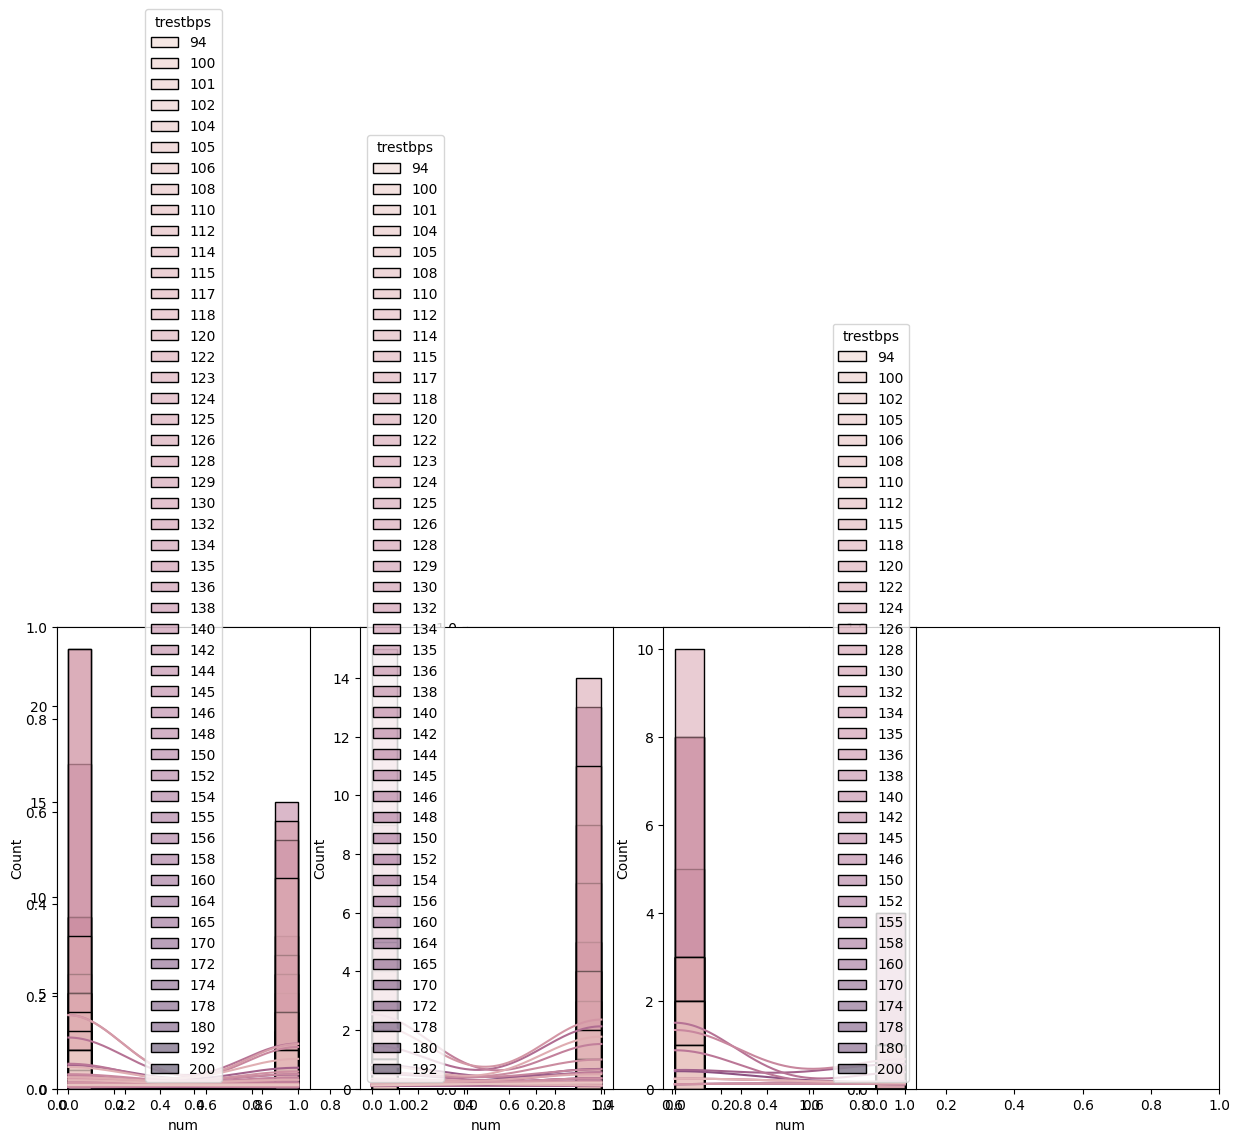

In [16]:
plt.subplots(1,3,figsize=(15,6))
plt.subplot(141)
sns.histplot(data=df,x='num',kde=True,hue='trestbps')
plt.subplot(142)
sns.histplot(data=df[df.sex==1],x='num',kde=True,hue='trestbps')
plt.subplot(143)
sns.histplot(data=df[df.sex==0],x='num',kde=True,hue='trestbps')
plt.show()